# EJERCICIOS

In [80]:
import sympy as sp
import numpy as np
from tabulate import tabulate
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [3]:

def dibuja (l,w,array,p,fs,N,j,ALL,continua):

    v = ['bo','ro','go','yo','co']
    k = ['explicito','implicito','implicito Approx','mejorado', 'Heun']
    if not ALL:
        fig, ax = plt.subplots(figsize=(l, w,))
        for i in range(3):
            ax.plot(array[i]['xx'],array[i]['yy'], v[i],label = "Euler {} N={}".format(k[j],N[i]))
        if continua:
            for i in range(2):
                ax.plot(array[i+3]['xx'],array[i+3]['yy'], v[i+3],label = "Euler {} N={}".format(k[i+3],N[i+3]))

        ax.plot(xx, y_x(xx), label="Solución exacta")
        ax.set_title(r"Solución exacta:  $y(t)=%s$" % sp.latex(p), fontsize=fs)
        ax.set_xlabel(r"$t$", fontsize=fs)
        ax.set_ylabel(r"$y$", fontsize=fs)
        ax.legend()
        fig.tight_layout()
        graf_Eulerexpl = fig

    else:
        
        if continua:
            for i in range(len(N)): 
                fig, ax = plt.subplots(figsize=(l, w))
                ax.plot(array[0][i]['xx'],array[0][i]['yy'], v[0],label = "Euler explícito N={}".format(N[i]))
                ax.plot(array[1][i]['xx'],array[1][i]['yy'], v[1],label = "Euler implícito N={}".format(N[i]))
                ax.plot(array[2][i]['xx'],array[2][i]['yy'], v[2],label = "Euler implícito aprox. N={}".format(N[i]))
                ax.plot(array[3][i]['xx'],array[3][i]['yy'], v[3],label = "Euler mejoradp N={}".format(N[i]))
                ax.plot(array[4][i]['xx'],array[4][i]['yy'], v[4],label = "Euler Heun N={}".format(N[i]))
                ax.plot(xx, y_x(xx), label="solución exacta")
                ax.set_title(r"Solución exacta:  $y(t)=%s$" % sp.latex(p), fontsize=fs)
                ax.set_xlabel(r"$t$", fontsize=fs)
                ax.set_ylabel(r"$y$", fontsize=fs)
                ax.legend()
                fig.tight_layout()
                fig
        else:

            for i in range(len(N)): 
                fig, ax = plt.subplots(figsize=(l, w))
                ax.plot(array[0][i]['xx'],array[0][i]['yy'], v[0],label = "Euler explícito N={}".format(N[i]))
                ax.plot(array[1][i]['xx'],array[1][i]['yy'], v[1],label = "Euler implícito N={}".format(N[i]))
                ax.plot(array[2][i]['xx'],array[2][i]['yy'], v[2],label = "Euler implícito aprox. N={}".format(N[i]))
                ax.plot(xx, y_x(xx), label="solución exacta")
                ax.set_title(r"Solución exacta:  $y(t)=%s$" % sp.latex(p), fontsize=fs)
                ax.set_xlabel(r"$t$", fontsize=fs)
                ax.set_ylabel(r"$y$", fontsize=fs)
                ax.legend()
                fig.tight_layout()
                fig


## Métodos de Euler

### EJERCICIO 1

 Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional.

Para ello, en primer lugar vamos a importar los métodos ya definidos:

In [4]:
import eulerimplicito
import eulerexplicito
import eulerimplicitoaprox

Vamos a repetir las aproximaciones para diferentes condiciones iniciales: diferente $N$, y por consiguiente, diferente $h$. Declaremos pues las variables necesarias:

In [5]:
# Declaración de variables
a,b = 0,1
ya = 1          # condición inicial del PVI
N = [20,50,80]

m_euler_exp     = []
m_euler_imp     = []
m_euler_imp_apr = []

In [6]:
# Definición de la función f
t, y0, z = sp.symbols('t,y0,z')
def f (t,z):
    return z

In [7]:
# Vamos a empezar definiendo la Ec. Dif. Ordinaria (edo) a resolver
y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
sp.Eq(edo,0)
# y la resolvemos simbólicamente mediante la orden dsolve de SymPy
edo_sol = sp.dsolve(edo)
# Imonemos las condiciones iniciales
ics = {y(0): y0}
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0)) #la ecuación asociada 
# a la imposición de la condición inicial del PVI
CI_sol = sp.solve(CI_eq) # que resolvemos mediante la orden solve
# para obtener la única solución exacta de nuestro PVI 
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
y_x = sp.lambdify(t, sol_exacta, 'numpy')
xx = np.linspace(a,b,100)

Una vez declarada la función a evual y calculada la solución por medio de Numpy, vamos a aplicar los métodos para $N \in {20,50,80}$; distintos valores de $N$ y por tanto de $h$ de tal forma que arrojen distintos niveles de precisión, estabilidad y coste computacional.

In [8]:
for i in range(len(N)):
    m_euler_exp.append({'xx': eulerexplicito.integrate(f,a,ya,b,N[i])[0], 'yy': eulerexplicito.integrate(f,a,ya,b,N[i])[1]})
    m_euler_imp.append({'xx': eulerimplicito.integrate(f,a,ya,b,N[i])[0], 'yy': eulerimplicito.integrate(f,a,ya,b,N[i])[1]})
    m_euler_imp_apr.append({'xx': eulerimplicitoaprox.integrate(f,a,ya,b,N[i])[0], 'yy': eulerimplicitoaprox.integrate(f,a,ya,b,N[i])[1]})

Comparemos de forma gráfica las aproximaciones a la solución exacta y veamos las perturbaciones producidas. Para ello, vamos a hacer uso de la función "dibuja", definida previamente:

Veamos con los otros métodos:

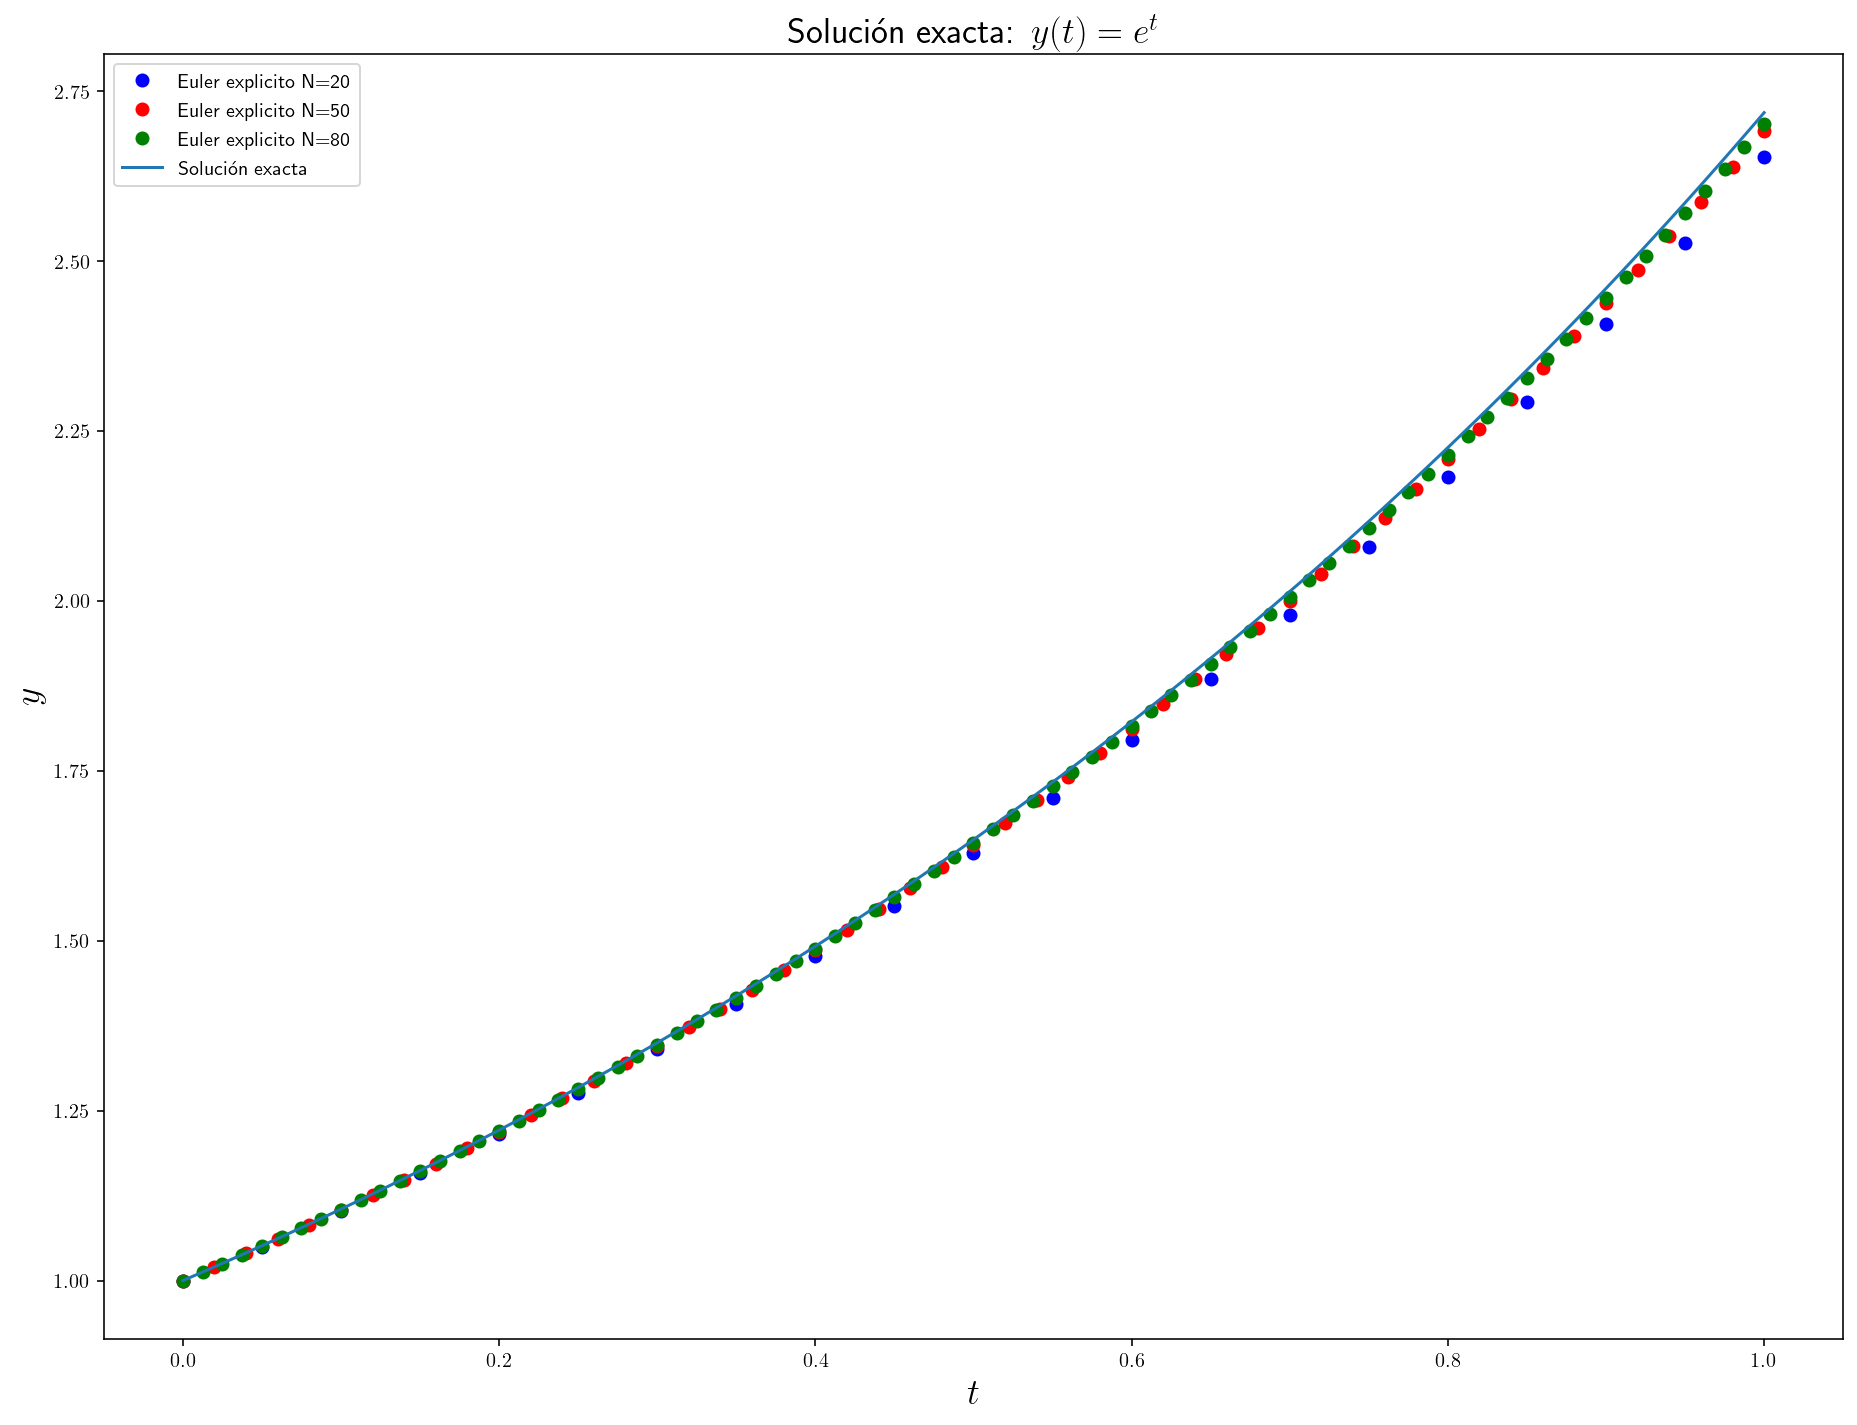

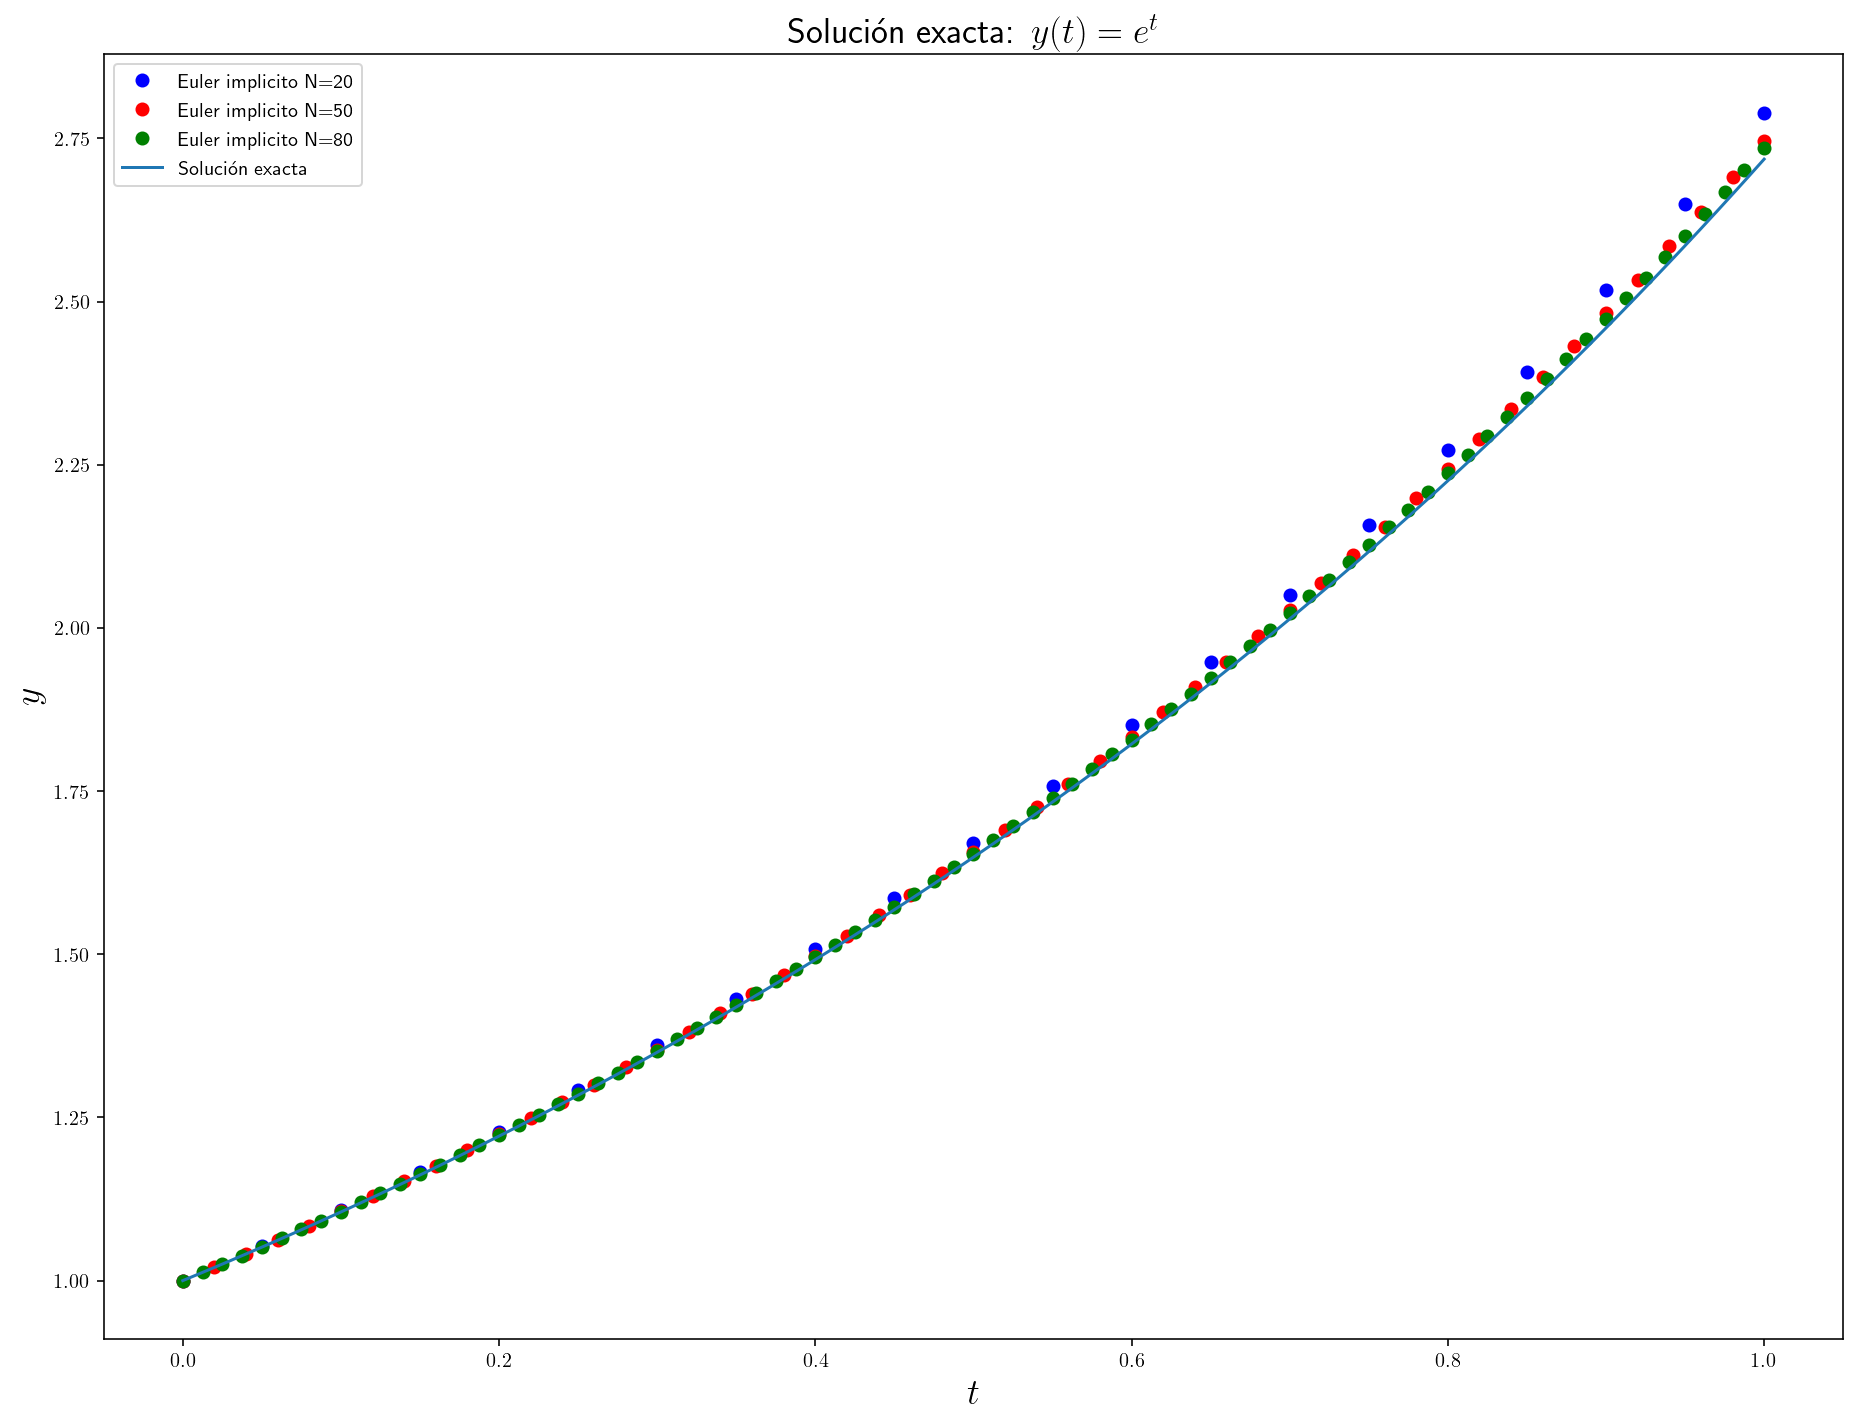

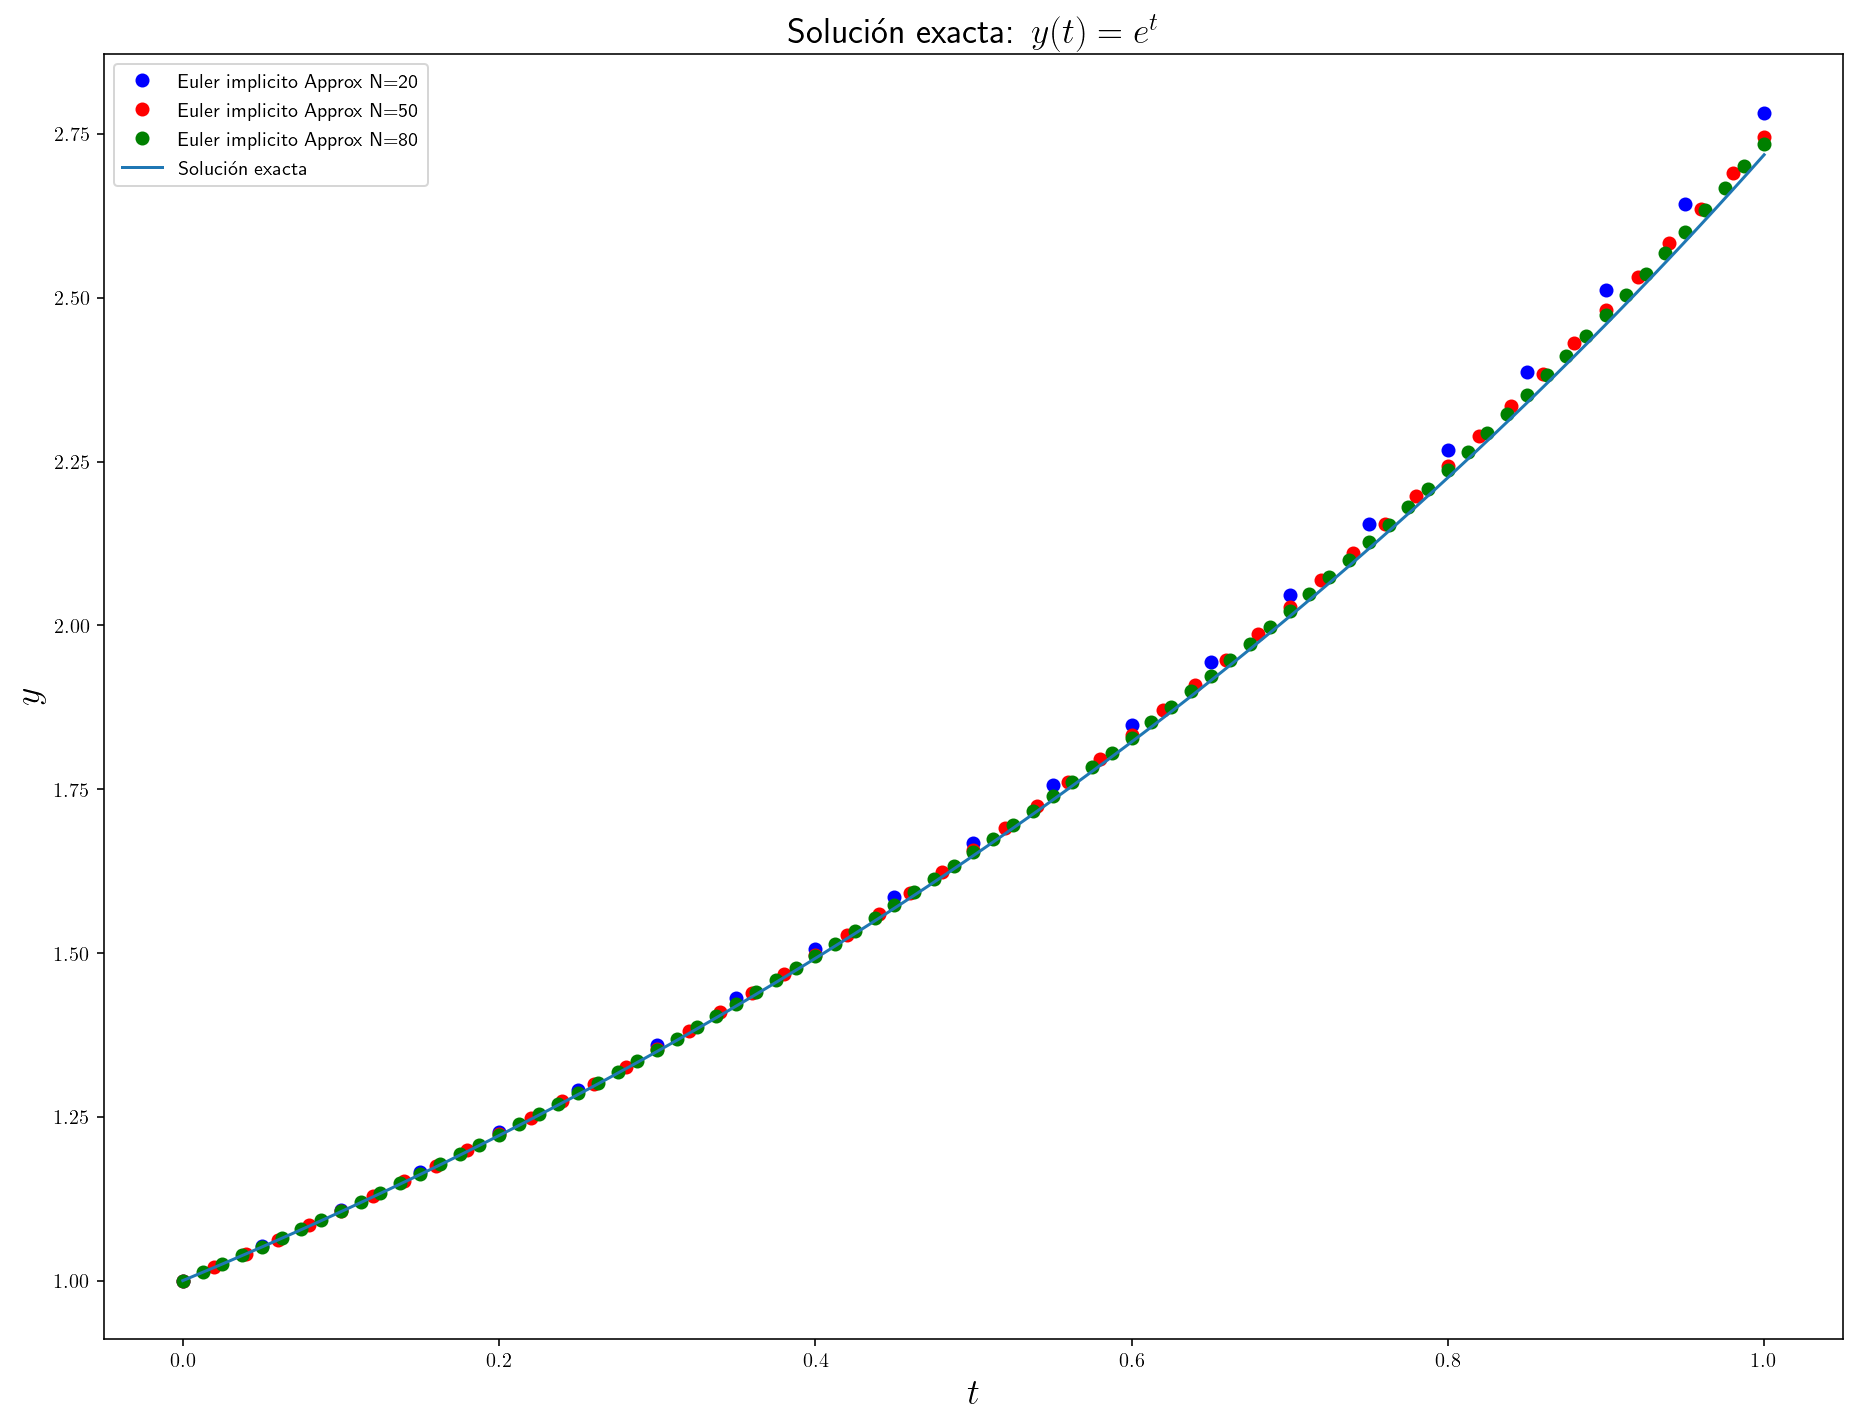

In [9]:
dibuja(13,10,m_euler_exp,sol_exacta,18,N,0,False,False)
dibuja(13,10,m_euler_imp,sol_exacta,18,N,1,False,False)
dibuja(13,10,m_euler_imp_apr,sol_exacta,18,N,2,False,False)

Para cada $N$, comparemos los métodos de Euler definidos:

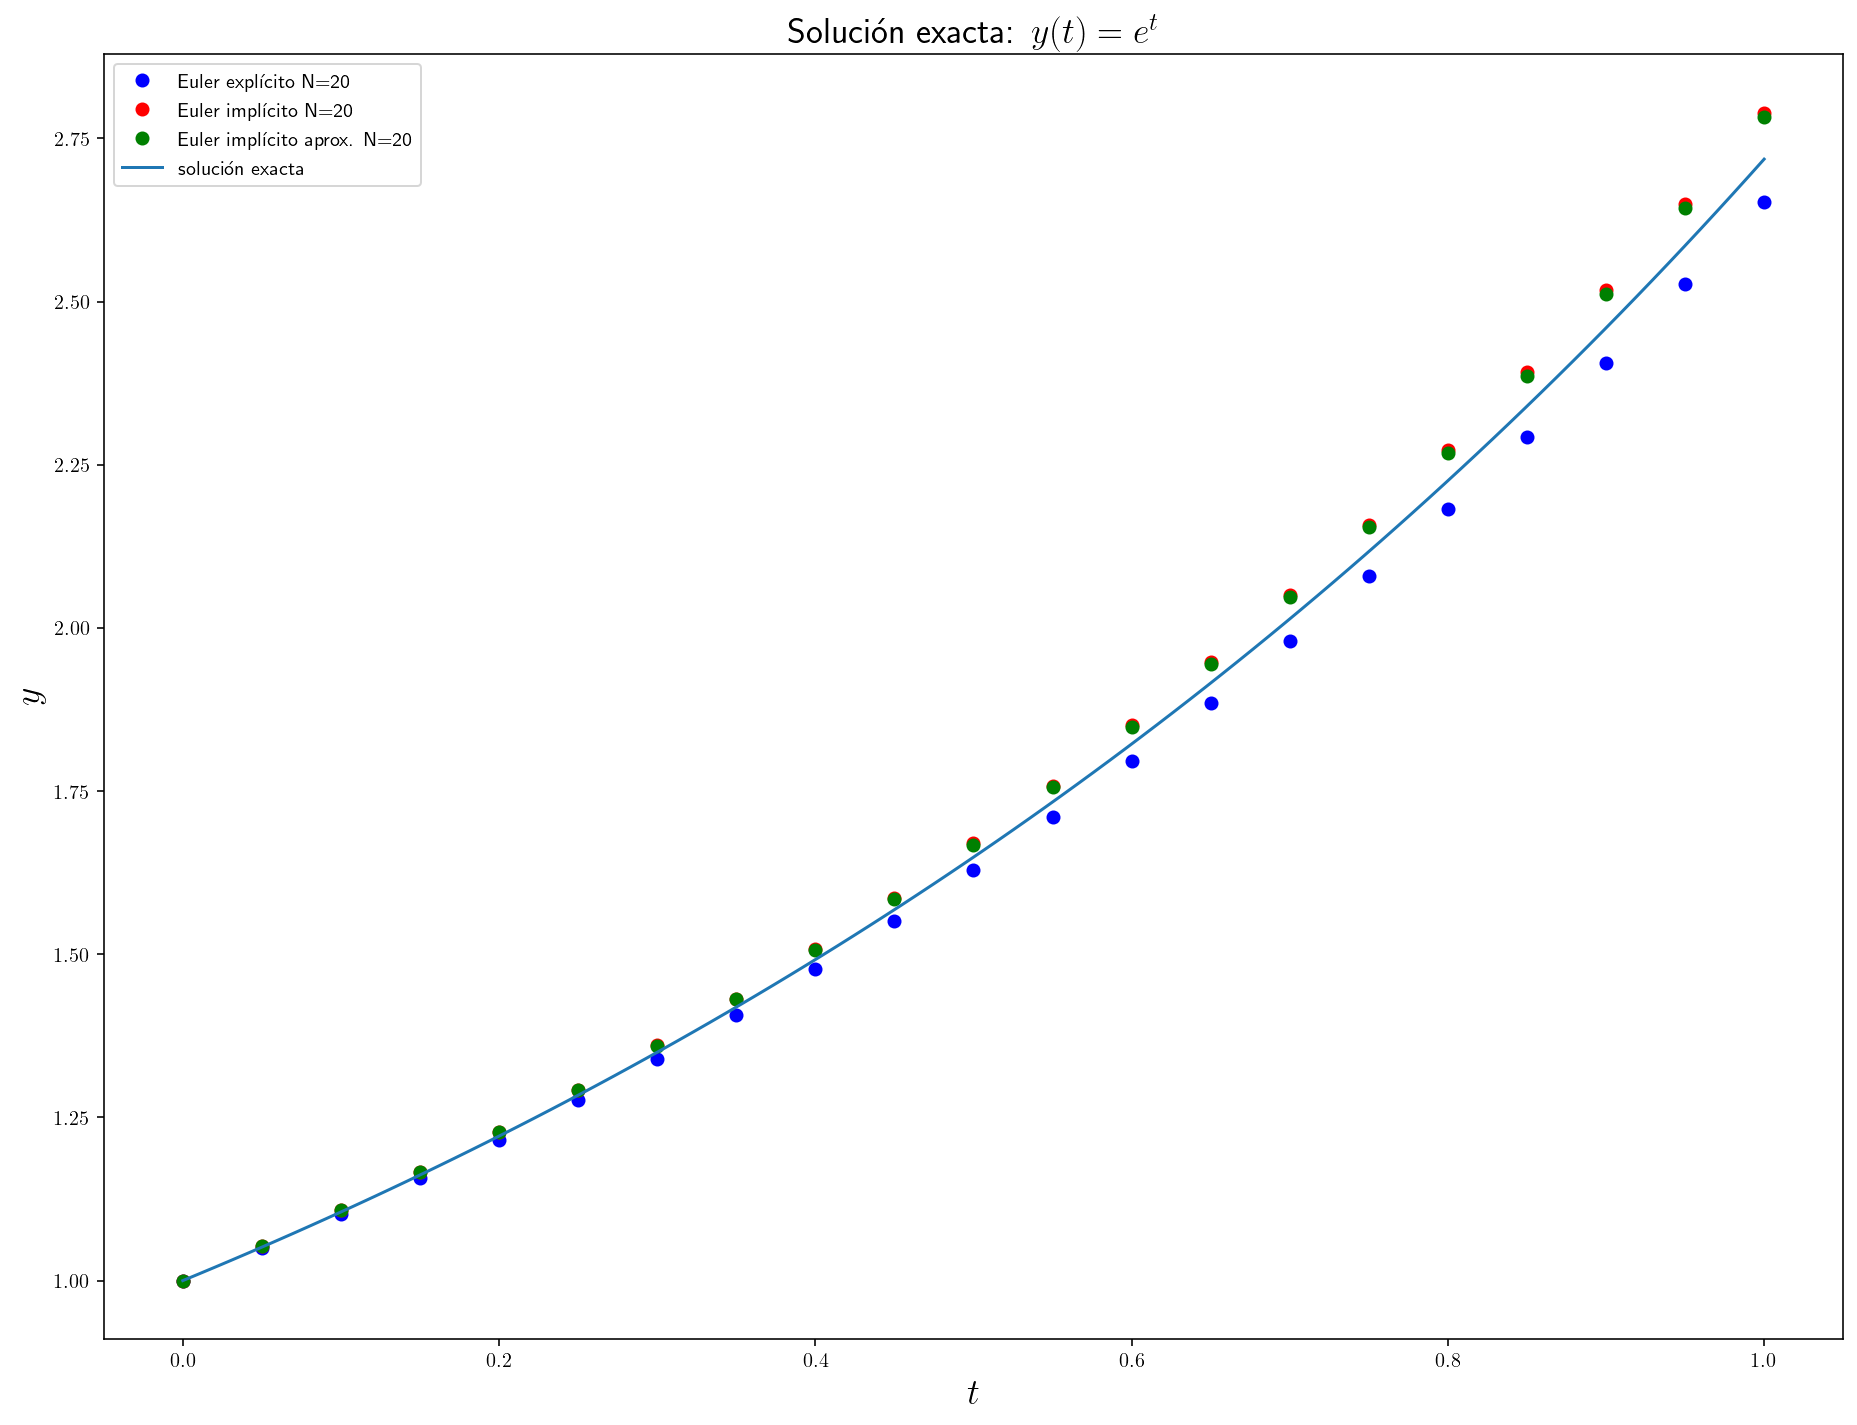

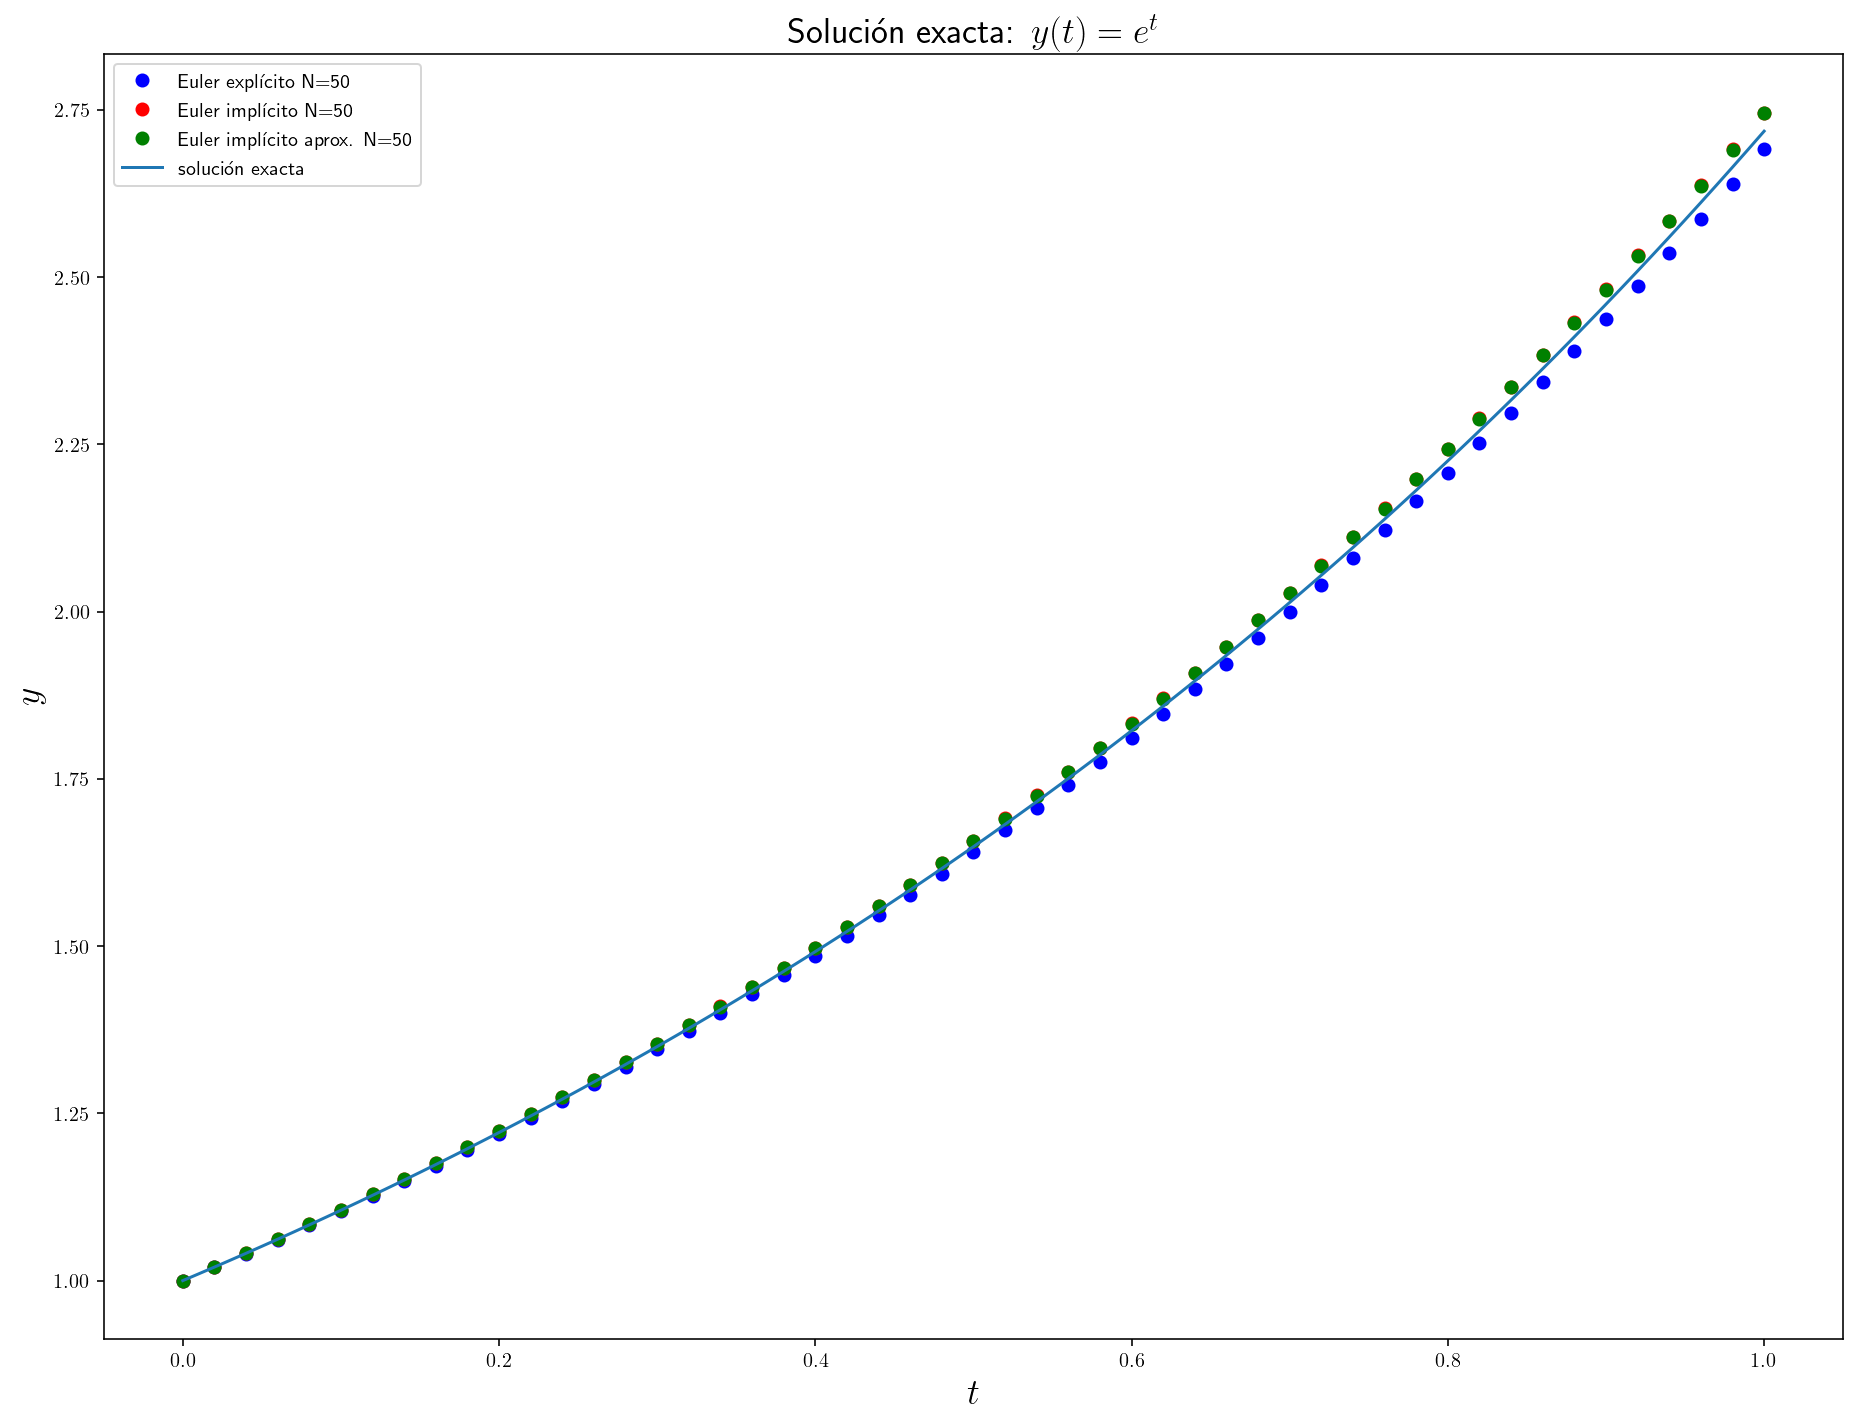

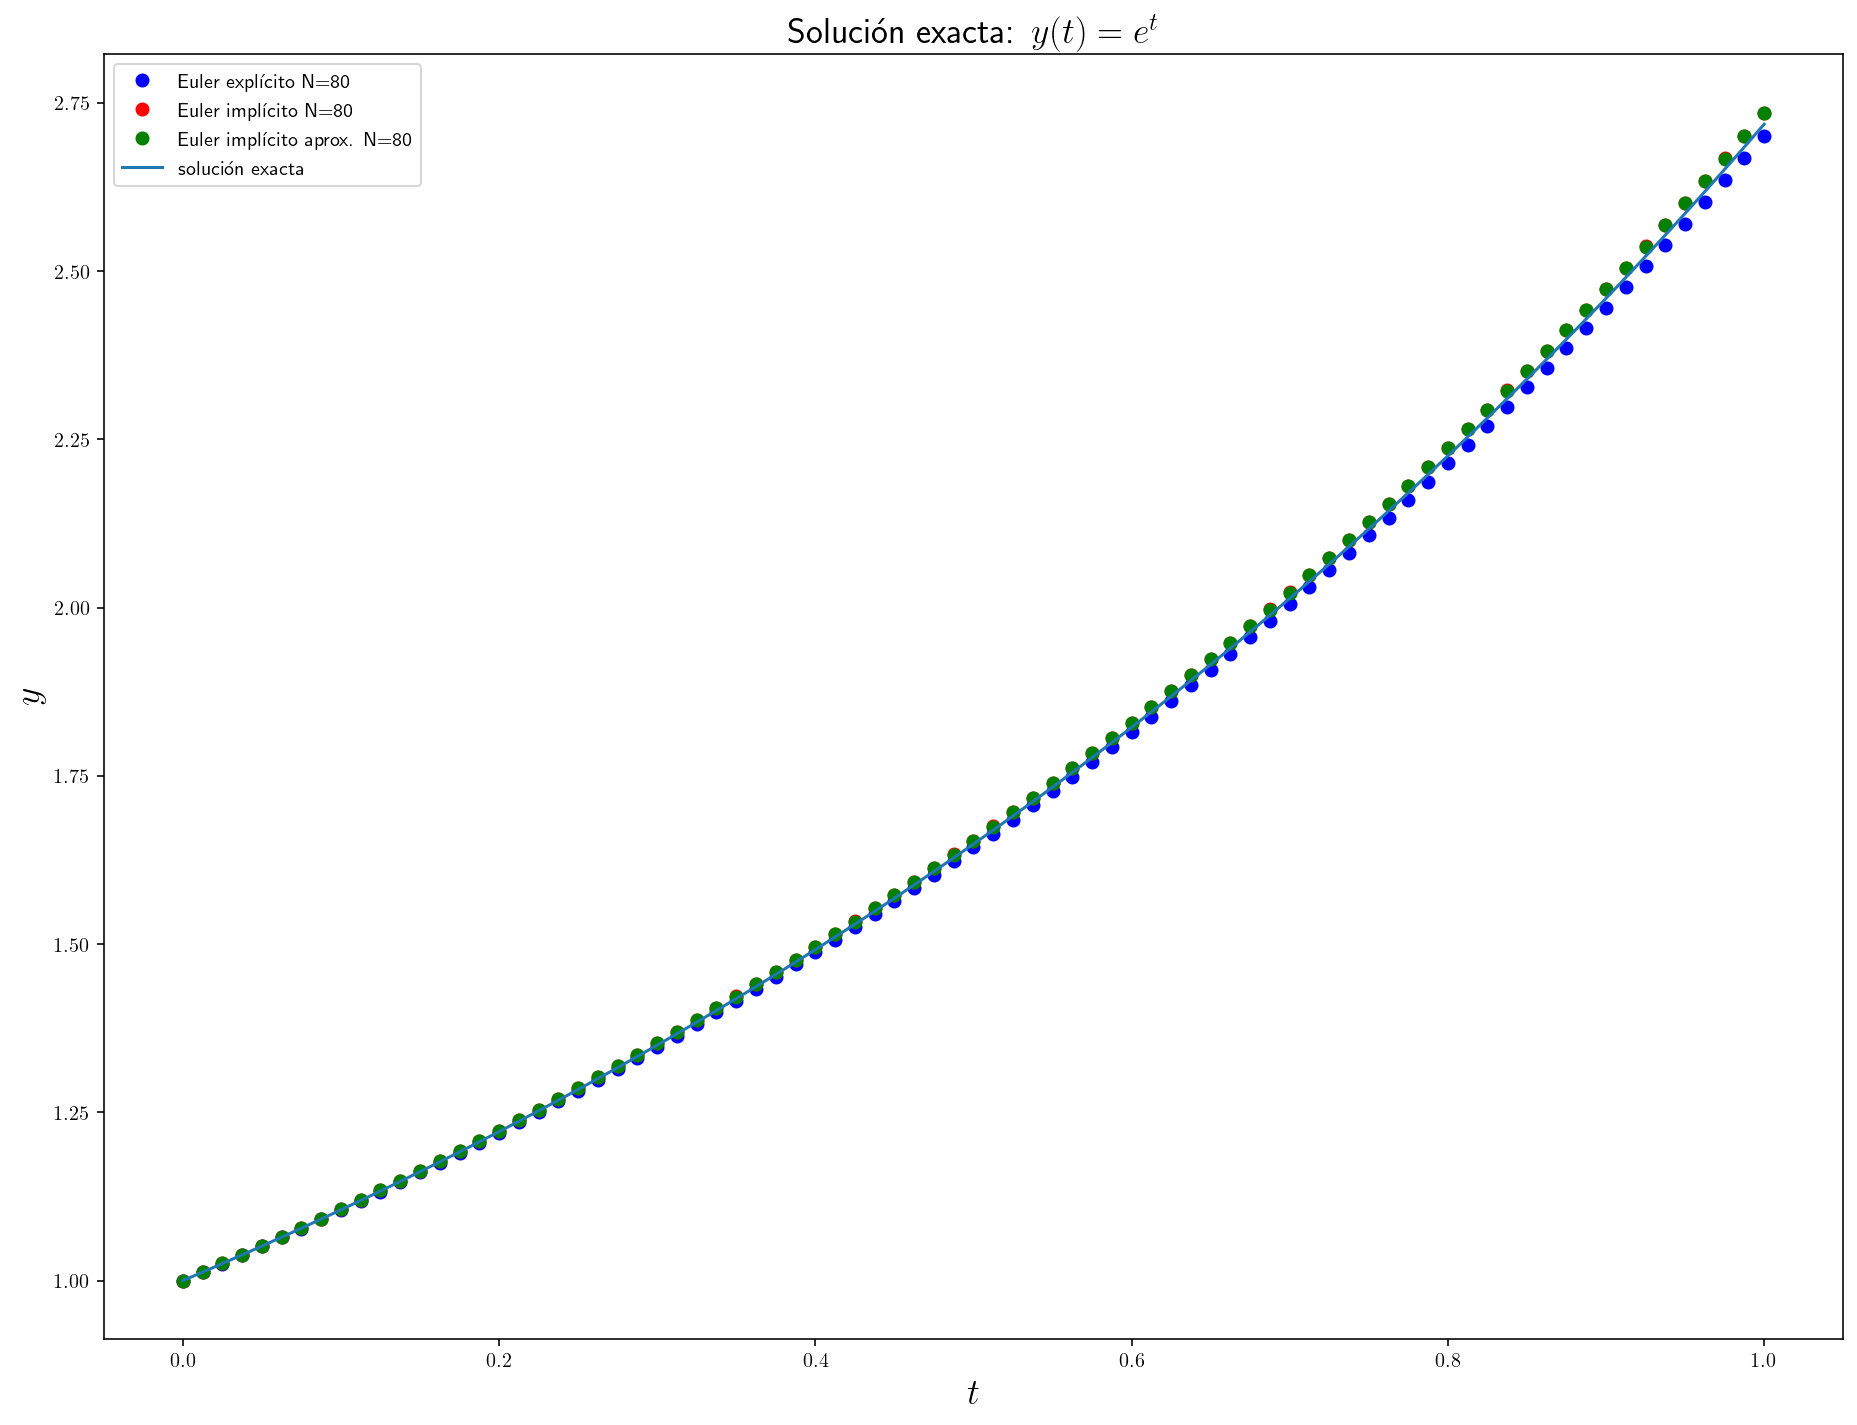

In [10]:
array = [m_euler_exp,m_euler_imp,m_euler_imp_apr]
dibuja(13,10,array,sol_exacta,18,N,2,True,False)

Observamos que conforme aumentamos el cardinal de la partición del intervalo, mejor es la aproximación.En concreto, como bien podemos observar de forma visual, el método que mejor aproxima $y(t)$ es el método de Euler explícito. Hecho que podemos corroborar comparando los errores cometidos en las aproximaciones de los distintos métodos:

In [11]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']
err_euler_exp     = ['Euler explícito']
err_euler_imp     = ['Euler implícito']
err_euler_imp_apr = ['Euler implítico Approx']
errores = [err_euler_exp, err_euler_imp, err_euler_imp_apr]

for i in range(len(errores)):
    for j in range (len(N)):
        errores[i].append(max(abs(array[i][j]['yy']-y_x(array[i][j]['xx']))))

print(tabulate([err_euler_exp,err_euler_imp,err_euler_imp_apr],head))

ERRORES                    N = 20     N = 50     N = 80
----------------------  ---------  ---------  ---------
Euler explícito         0.0649841  0.0266938  0.0167969
Euler implícito         0.071228   0.0276909  0.0171863
Euler implítico Approx  0.0642625  0.0265927  0.0167589


### Observaciones:
- Disminución del error a medida que se aumenta el número de subintervalos de la partición.
- El método de euler implícito approx. es un poquito mejor que el explícito, aunque por muy poca diferencia. 

Nos queda por último cuantificar y comparar el coste computacional de los métodos. Para ello, vamos a medir el tiempo que tardan en ejecutarse la función:

> metodo.integrate(f,a,ya,b,N[i])

In [12]:
%%timeit
eulerexplicito.integrate(f,a,ya,b,N[0])

31 µs ± 5.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%%timeit
eulerimplicito.integrate(f,a,ya,b,N[0])

333 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
eulerimplicitoaprox.integrate(f,a,ya,b,N[0])

33.4 µs ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%%timeit
eulerexplicito.integrate(f,a,ya,b,N[1])

39.9 µs ± 4.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%%timeit
eulerimplicito.integrate(f,a,ya,b,N[1])

719 ms ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
eulerimplicitoaprox.integrate(f,a,ya,b,N[1])

46.7 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit
eulerexplicito.integrate(f,a,ya,b,N[2])

43.9 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%%timeit
eulerimplicito.integrate(f,a,ya,b,N[2])

1.39 s ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
eulerimplicitoaprox.integrate(f,a,ya,b,N[2])

61.2 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Observaciones

Cuanto más fina es la partición del intervalo, mayor es el coste computacional, pues se incrementa el número de operaciones y la dificultad en la realización de las mismas, hecho que podemos observar en el método implícito, que es el que más tarda para todo $N$ (ya que se tiene que resolver una ecuación en cada iteración.)


### EJERCICIO 2
A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [21]:
%%file eulermejorado.py
## módulo euler
''' método de Euler del punto medio para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N; h2 = h/2
    for n in range(N):
        Y.append(Y[n] + h*F(X[n]+h2,Y[n]+h2*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

Overwriting eulermejorado.py


In [22]:
%%file eulerheun.py
## módulo euler
''' método de Euler-Heun para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N; h2 = h/2
    for n in range(N):
        Y.append(Y[n] + h2*(F(X[n],Y[n]) + F(X[n+1],Y[n]+h*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)

Overwriting eulerheun.py


In [23]:
import eulermejorado
import eulerheun

Procedemos como en el ejercicio anterior:

In [24]:
m_euler_mej      = []
m_euler_heun     = []

In [25]:
for i in range(len(N)):
    m_euler_mej.append({'xx': eulermejorado.integrate(f,a,ya,b,N[i])[0], 'yy': eulermejorado.integrate(f,a,ya,b,N[i])[1]})
    m_euler_heun.append({'xx': eulerheun.integrate(f,a,ya,b,N[i])[0], 'yy': eulerheun.integrate(f,a,ya,b,N[i])[1]})

Comparamos los métodos (todos) para distintos valores de $N$

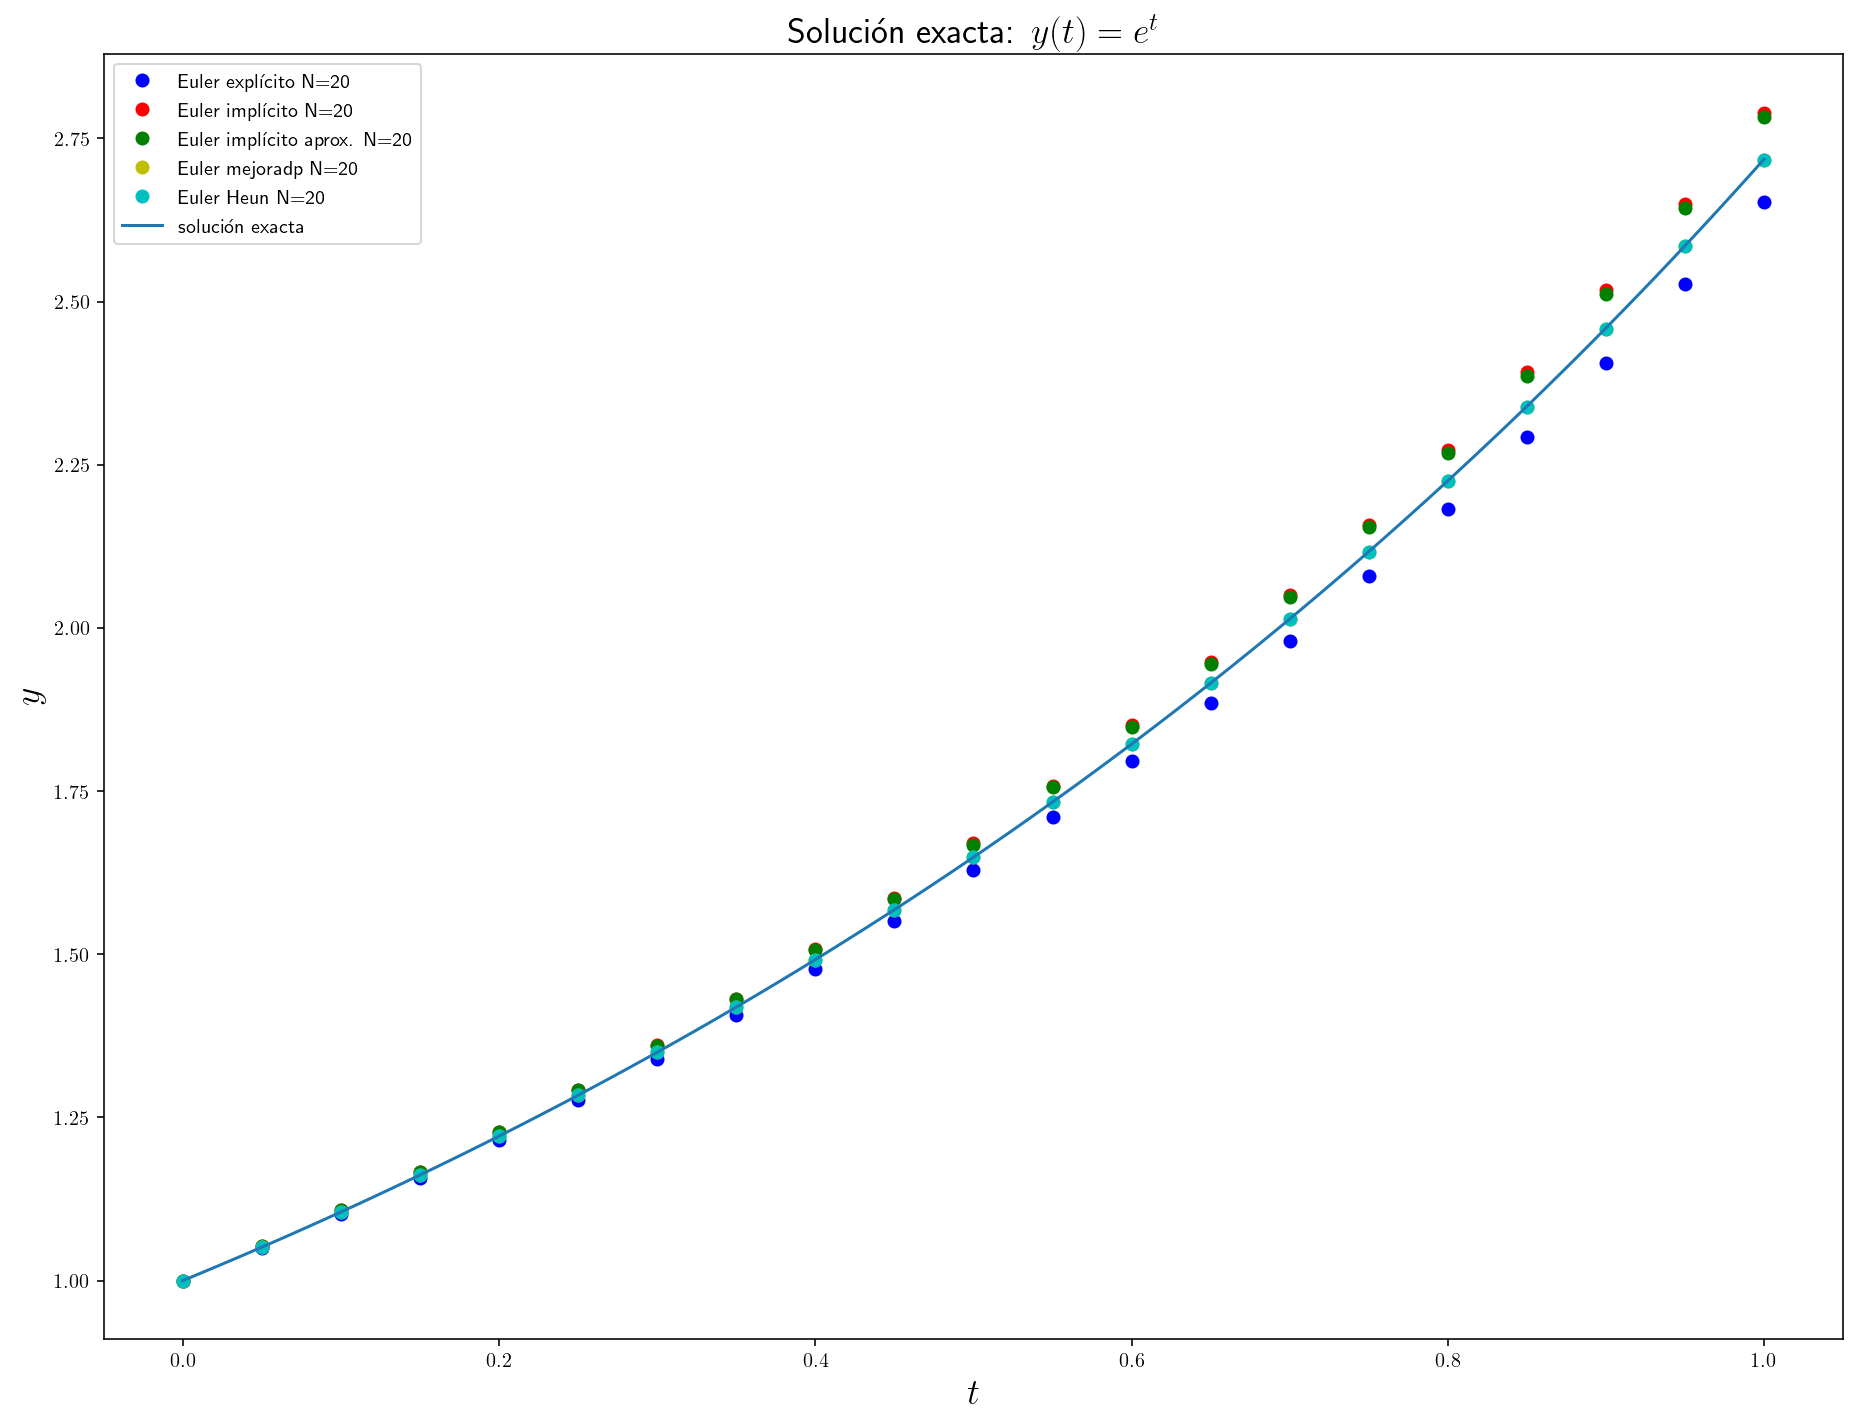

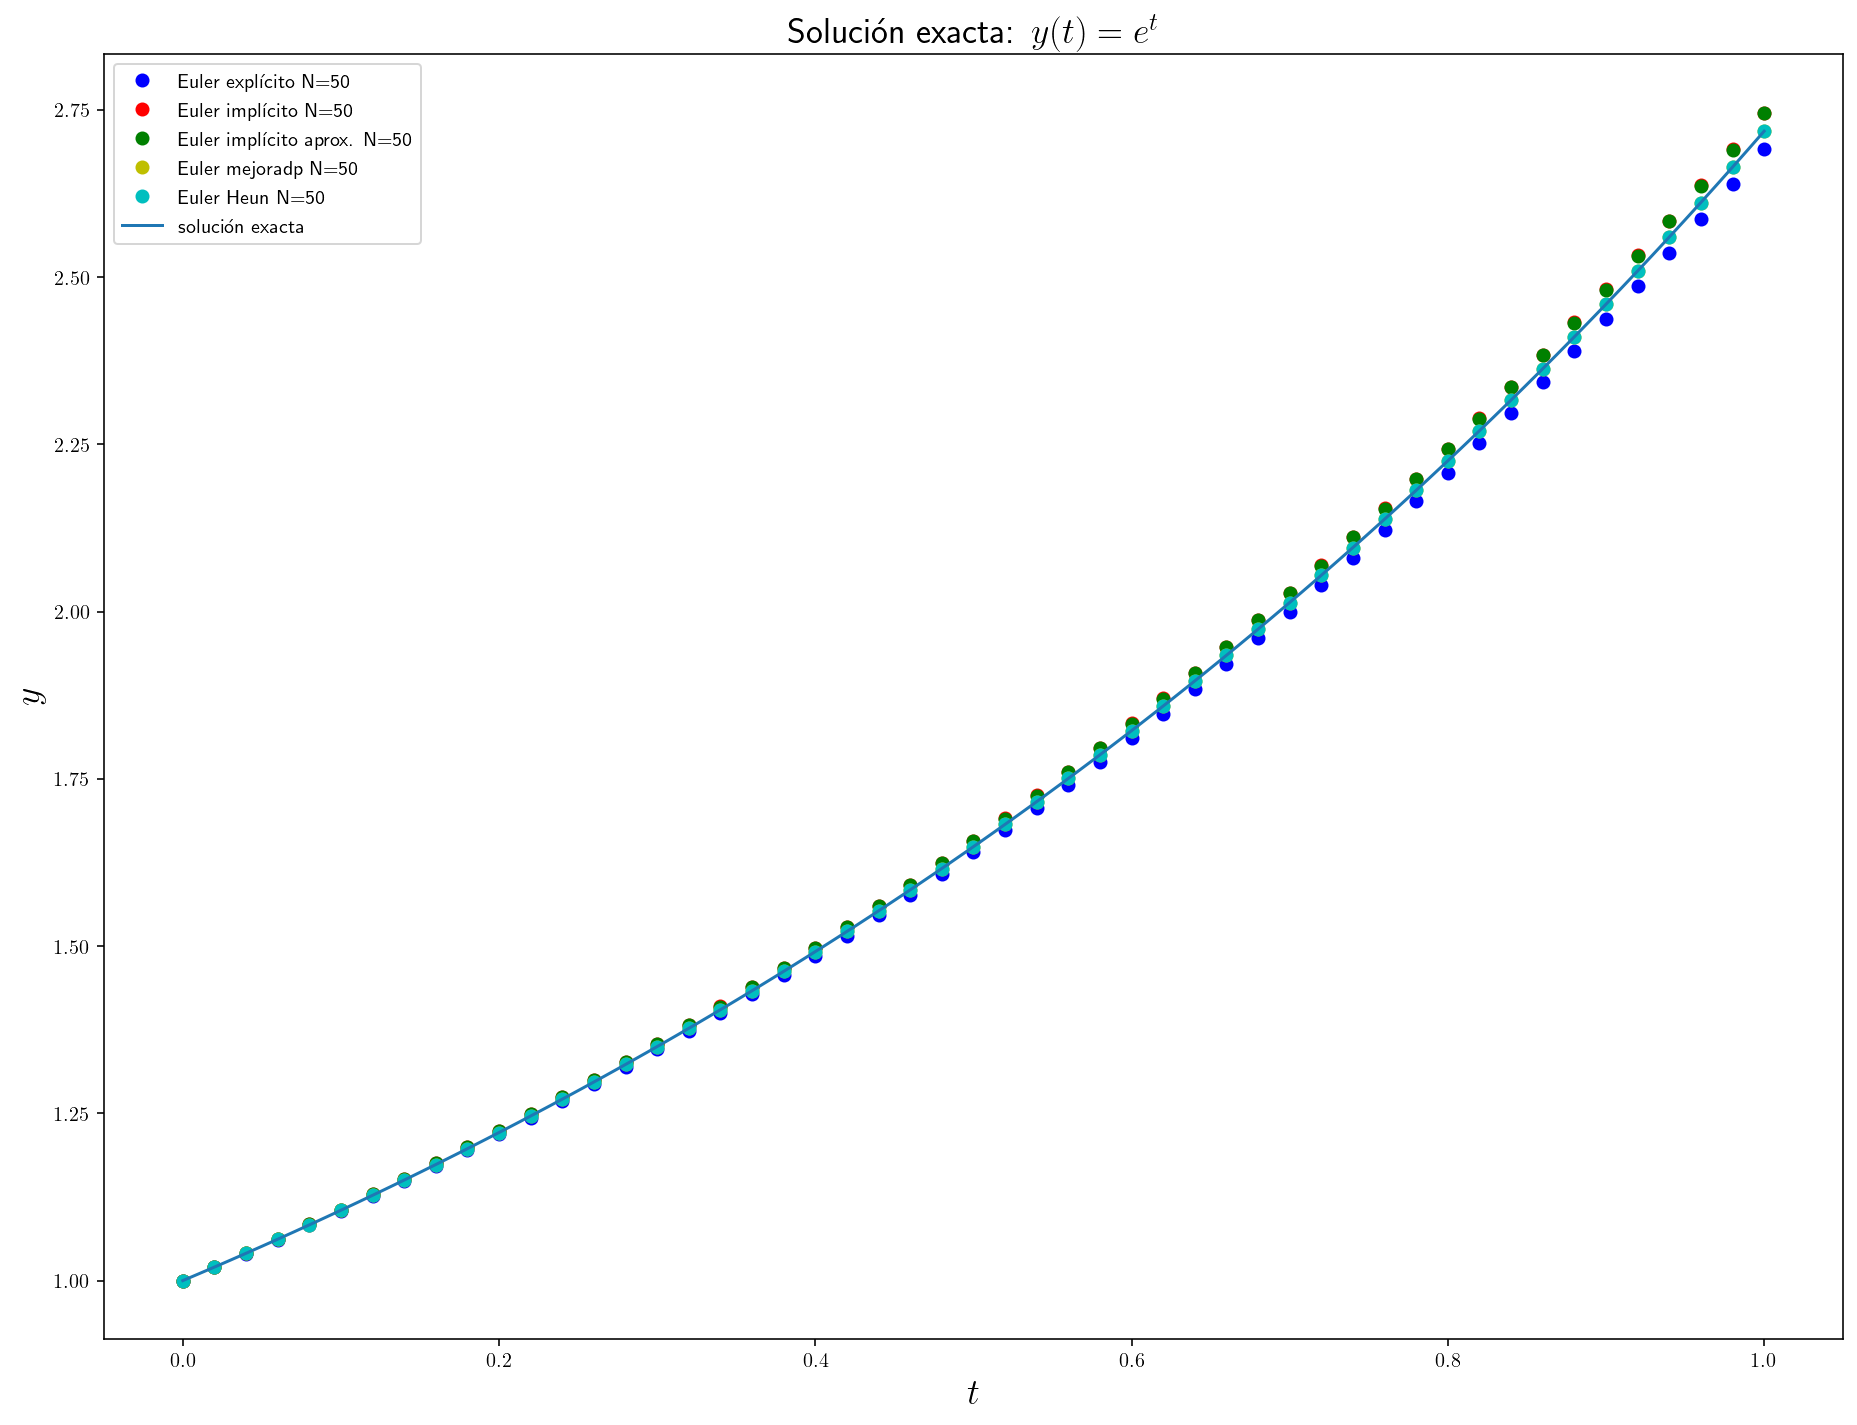

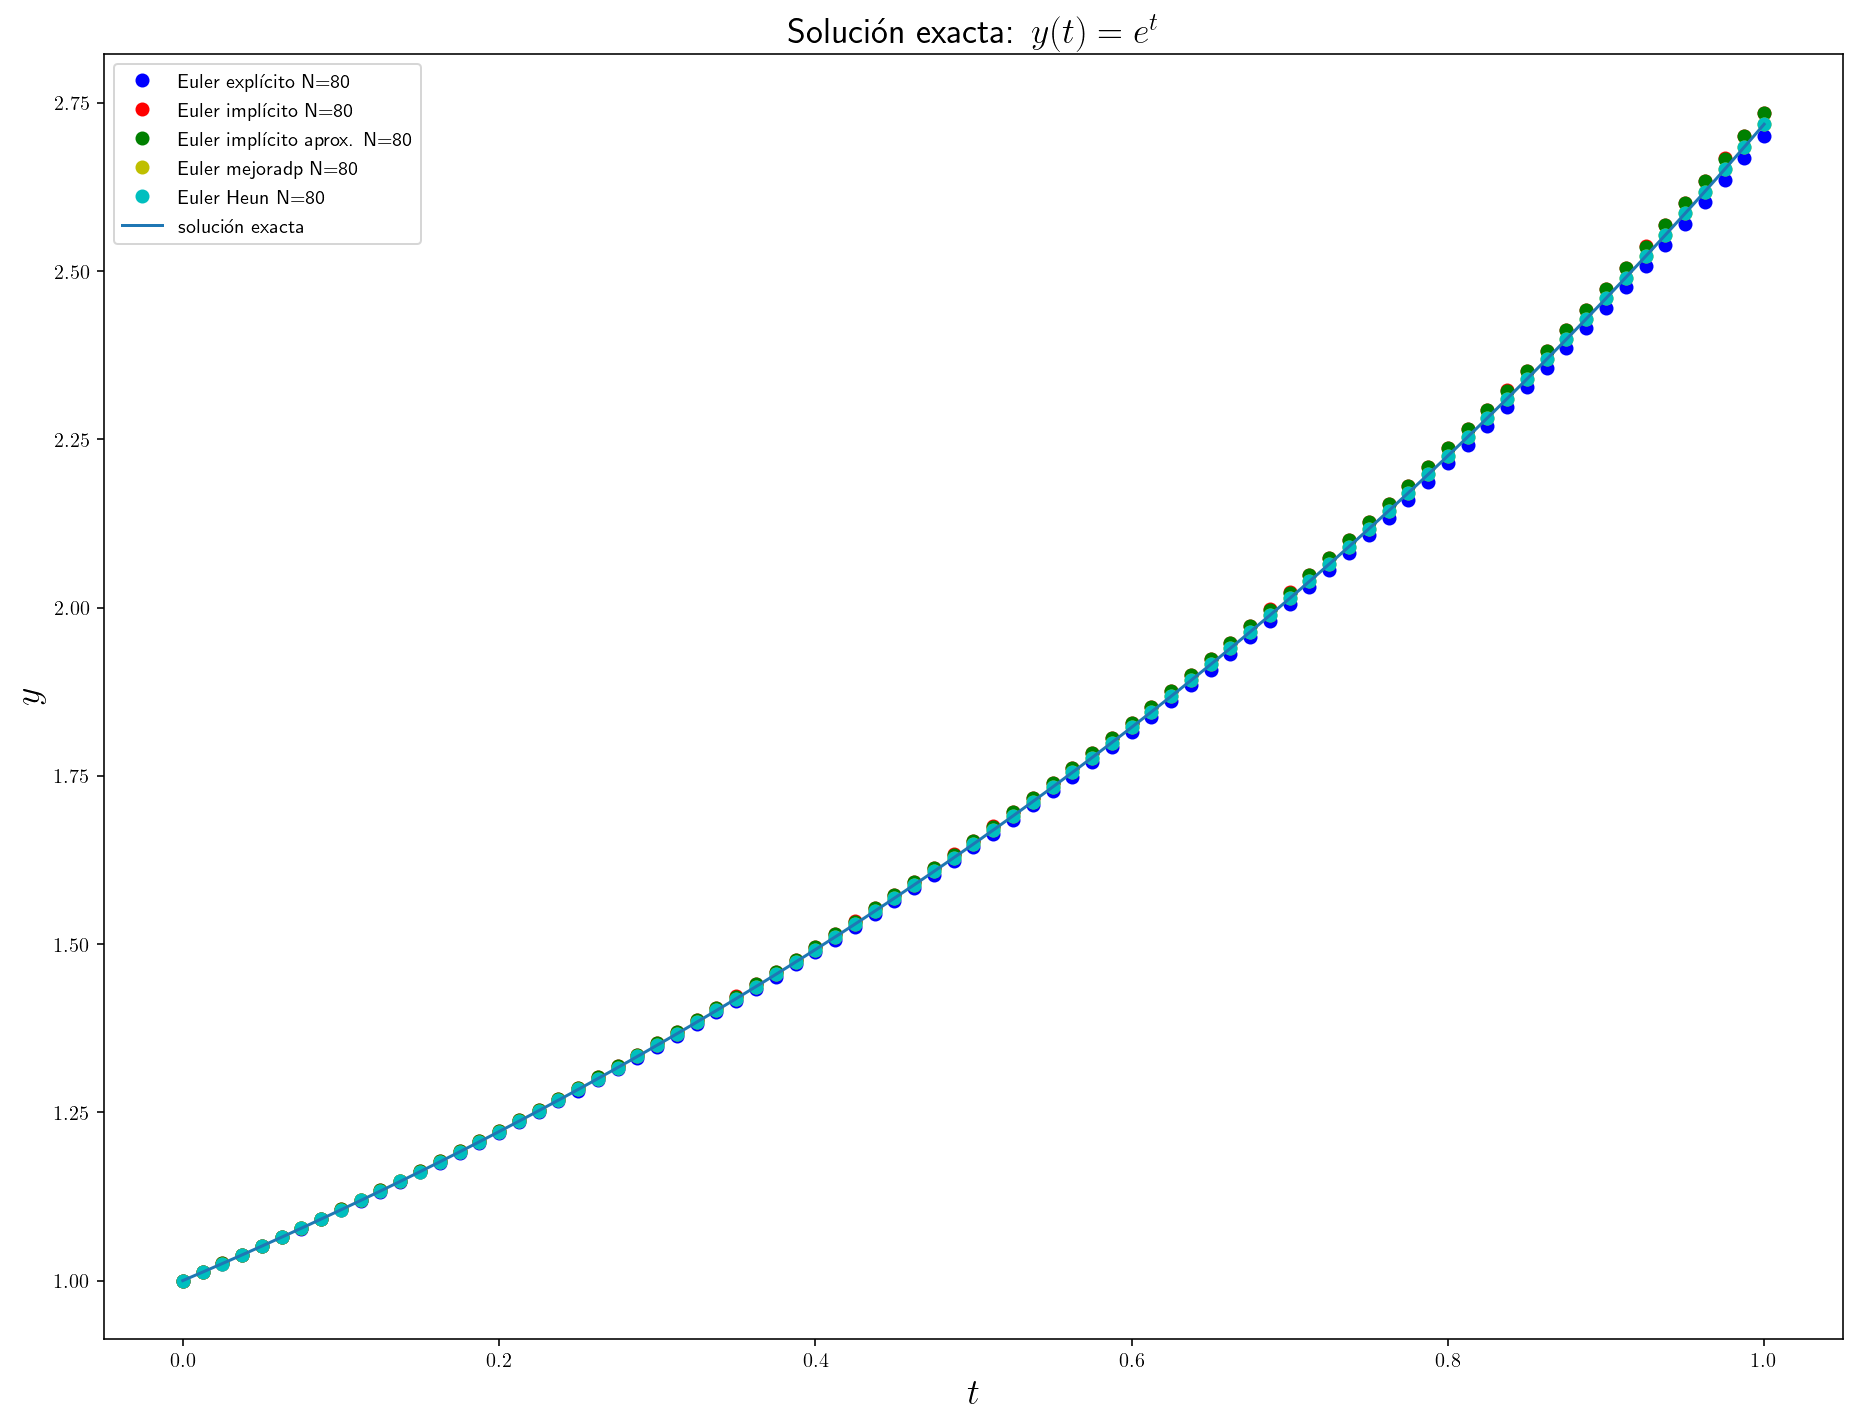

In [26]:
array = [m_euler_exp,m_euler_imp,m_euler_imp_apr,m_euler_mej,m_euler_heun]
dibuja(13,10,array,sol_exacta,18,N,2,True,True)

Comparemos errores cometidos en la aproximación

In [27]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']
err_euler_exp     = ['Euler explícito']
err_euler_imp     = ['Euler implícito']
err_euler_imp_apr = ['Euler implítico Approx']
err_euler_mej     = ['Euler mejorado']
err_euler_heun    = ['Euler Heun']
errores = [err_euler_exp, err_euler_imp, err_euler_imp_apr,err_euler_mej, err_euler_heun]

for i in range(len(errores)):
    for j in range (len(N)):
        errores[i].append(max(abs(array[i][j]['yy']-y_x(array[i][j]['xx']))))

print(tabulate([err_euler_exp,err_euler_imp,err_euler_imp_apr,err_euler_mej,err_euler_heun],head))

ERRORES                     N = 20       N = 50       N = 80
----------------------  ----------  -----------  -----------
Euler explícito         0.0649841   0.0266938    0.0167969
Euler implícito         0.071228    0.0276909    0.0171863
Euler implítico Approx  0.0642625   0.0265927    0.0167589
Euler mejorado          0.00109077  0.000178516  7.01274e-05
Euler Heun              0.00109077  0.000178516  7.01274e-05


Comparemos tiempos de CPU de las operaciones:

In [28]:
%%timeit
eulermejorado.integrate(f,a,ya,b,N[1])

52.7 µs ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit
eulerheun.integrate(f,a,ya,b,N[1])

58.8 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Observaciones

Los dos métodos, mejorado y Heun, a la vista de los resultados obtenidos son mejores que los demás métodos anteriores, tanto en error cometido como en coste computacional.

________________________________________________________________________________

## Métodos de Taylor

### EJERCICIO 1

Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.

In [30]:
import Taylor2

Procedemos como anteriomente hemos ido haciendo. Mantenemos los mismos valores de $N$ que antes.

In [31]:
met_taylor = []
array = [m_euler_mej,m_euler_heun,met_taylor]
for i in range(len(N)):
    met_taylor.append({'xx': Taylor2.integrate(f,a,ya,b,N[i])[0], 'yy': Taylor2.integrate(f,a,ya,b,N[i])[1]})
    

Comparamos errores

In [32]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']
err_euler_mej     = ['Euler mejorado']
err_euler_heun    = ['Euler Heun']
err_taylor        = ['Taylor']

errores = [err_euler_mej, err_euler_heun, err_taylor]

for i in range(len(errores)):
    for j in range (len(N)):
        errores[i].append(max(abs(array[i][j]['yy']-y_x(array[i][j]['xx']))))

print(tabulate([err_euler_mej,err_euler_heun,err_taylor],head))

ERRORES             N = 20       N = 50       N = 80
--------------  ----------  -----------  -----------
Euler mejorado  0.00109077  0.000178516  7.01274e-05
Euler Heun      0.00109077  0.000178516  7.01274e-05
Taylor          0.00109077  0.000178516  7.01274e-05


Medimos el coste computacional de la operación:

In [33]:
%%timeit
Taylor2.integrate(f,a,ya,b,N[1])

14.4 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Observaciones

En vista de los resultados concluimos que el método de Taylor de orden $p=2$ consigue aproximar muy decentemente la solución, hecho que se refleja en el error máximo cometido pues es muy bajo y además coincide con los métodos de Euler, mejorado y Heun.

En cabmio, como acabamos de obtener, requiere un mayor tiempo de ejecución frente a los dos métodos mencionados (del orden de los milisegundos), y por consiguiente, tiene un mayor coste computacional. Esto se debe al cáculo de derivadas que requiere.

### EJERCICIO 2

 A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

La modificación que tenemos que hacer frente al método anterior es simplemente aumentar el grado del polinomio de Taylor una unidad:

$$y(t+h)\approx y(t)+h\,F_1(t,z) +\frac{h^2}{2}\, F_2(t,z) + \frac{h^3}{6}\, F_3(t,z)$$

donde $F_3(t,z) = \frac{dF_{2}}{dt}(t,z) + \frac{dF_{2}}{dt}(t,z)F_{1}(t,z) $

Definamos entonces el método convenientemente:

In [34]:
%%file Taylor3.py
## módulo Taylor3
''' método del método de Taylor de orden 3 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    def F3(t,z):
        return sp.diff(F2(t,z),t) + sp.diff(F2(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]})+h**3/6*F3(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

Overwriting Taylor3.py


In [35]:
import Taylor3

Procedemos como anteriomente:

In [36]:
met_taylor3 = []
array = [met_taylor,met_taylor3]
for i in range(len(N)):
    met_taylor3.append({'xx': Taylor3.integrate(f,a,ya,b,N[i])[0], 'yy': Taylor3.integrate(f,a,ya,b,N[i])[1]})

In [37]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']
err_taylor        = ['Taylor 2']
err_taylor3        = ['Taylor 3']

errores = [err_taylor,err_taylor3]

for i in range(len(errores)):
    for j in range (len(N)):
        errores[i].append(max(abs(array[i][j]['yy']-y_x(array[i][j]['xx']))))

print(tabulate([err_taylor,err_taylor3],head))

ERRORES        N = 20       N = 50       N = 80
---------  ----------  -----------  -----------
Taylor 2   0.00109077  0.000178516  7.01274e-05
Taylor 3   1.3603e-05  8.91716e-07  2.19014e-07


Medimos tiempos:

In [38]:
%%timeit
Taylor3.integrate(f,a,ya,b,N[1])

41.9 ms ± 3.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


###  Observaciones

Taylor de orden $p=3$ obtiene errores más pequeños que el del orden 2, pero a costa de un aumento del coste computacional.

_____________________________________________

## Métodos Runge-Kutta

### EJERCICIO 1
Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional.

In [39]:
import RK4

In [40]:
runge4k = []
array = [m_euler_exp,m_euler_imp,m_euler_imp_apr,m_euler_mej,m_euler_heun,met_taylor,met_taylor3,runge4k]
for i in range(len(N)):
    runge4k.append({'xx': RK4.integrate(f,a,ya,b,N[i])[0], 'yy': RK4.integrate(f,a,ya,b,N[i])[1]})

Comparemos errores cometidos en la aproximación:

In [41]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']
err_runge4k = ['Error Runge Kute orden 4']
errores = [err_euler_exp, err_euler_imp, err_euler_imp_apr,err_euler_mej, err_euler_heun,err_taylor,err_taylor3,err_runge4k]

for j in range (len(N)):
    err_runge4k.append(max(abs(runge4k[j]['yy']-y_x(runge4k[j]['xx']))))

print(tabulate([err_euler_exp,err_euler_imp,err_euler_imp_apr,err_euler_mej,err_euler_heun,err_taylor,err_taylor3,err_runge4k],head))

ERRORES                        N = 20       N = 50       N = 80
------------------------  -----------  -----------  -----------
Euler explícito           0.0649841    0.0266938    0.0167969
Euler implícito           0.071228     0.0276909    0.0171863
Euler implítico Approx    0.0642625    0.0265927    0.0167589
Euler mejorado            0.00109077   0.000178516  7.01274e-05
Euler Heun                0.00109077   0.000178516  7.01274e-05
Taylor 2                  0.00109077   0.000178516  7.01274e-05
Taylor 3                  1.3603e-05   8.91716e-07  2.19014e-07
Error Runge Kute orden 4  1.35803e-07  3.56449e-09  5.47305e-10


Medimos tiempos de CPU:

In [42]:
%%timeit
RK4.integrate(f,a,ya,b,N[1])

81.6 µs ± 3.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Observaciones

Se aprecia una mejora del error máximo cometido en la aproximación, un menor coste computacional que los métodos de Taylor, aunque mayor tiempo de CPU que los métodos de Euler, explícito e implícito approx. El que mayor consumo de CPU produce sigue siendo el euler implícito.

### EJERCICIO 2

 A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.

Hacemos el método de Runge-Kuta, explícito, a partir del arreglo de Butcher:

In [43]:
%%file ERK.py
## módulo ERK
''' Método de Runge-Kutta explícito para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,h).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    butcher = arreglo de butcher
'''
import numpy as np
def integrate(F,x0,y0,xfinal,butcher,N):
    a,b,c = [], [], []

    for k in butcher:
        c.append(k[0])
        a.append(k[1])
        b.append(k[2])
    
    def RK(F,xn,yn,h):
        K = []
        for i in range(len(butcher)):
            s = 0
            for j in range(i):
                s += a[i][j]*K[j]
            K.append(F(xn+c[i]*h,yn+h*s))
        
        return sum(b[i]*K[i] for i in range(len(butcher)))
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

Overwriting ERK.py


In [44]:
import ERK

Vamos a llevar a cabo una comparación de los arreglos de butcher para Runge Kutta de orden 4, explícito, y para Runge Kutta de orden 2 del punto medio y Heun con los métodos ya implementados y analizados en los ejercicios previos.

In [65]:
butcherExplicito     = [[0,[0,0,0,0],1/6],[1/2,[1/2,0,0,0],2/6],[1/2,[0,1/2,0,0],2/6],[1,[0,0,1,0],1/6]]
butcherPuntoMedio     = [[0,[0,0],0],[1/2,[1/2,0],1]]
butcherRalston        = [[0,[0,0],1/4],[2/3,[2/3,0],3/4]]

In [69]:
butcherexp = []
butcherPM  = []
butcherRal = []

array.append(butcherexp)
array.append(butcherPM)
array.append(butcherRal)

for i in range(len(N)):
    butcherexp.append({'xx': ERK.integrate(f,a,ya,b,butcherExplicito,N[i])[0], 'yy': ERK.integrate(f,a,ya,b,butcherExplicito,N[i])[1]})
    butcherPM.append({'xx': ERK.integrate(f,a,ya,b,butcherPuntoMedio,N[i])[0], 'yy': ERK.integrate(f,a,ya,b,butcherPuntoMedio,N[i])[1]})
    butcherRal.append({'xx': ERK.integrate(f,a,ya,b,butcherRalston,N[i])[0], 'yy': ERK.integrate(f,a,ya,b,butcherRalston,N[i])[1]})

Comparemos los métodos:

In [70]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']
err_butcherExp = ['Error Runge Kuta orden 4 explícito']
err_butcherPM  = ['Error Runge Kuta orden 2 con Punto Medio']
err_butcherRal = ['Error Runge Kuta orden 2 Butcher Ralston']

errores.append(err_butcherExp)
errores.append(err_butcherPM)
errores.append(err_butcherRal)

for j in range (len(N)):
    err_butcherExp.append(max(abs(butcherexp[j]['yy']-y_x(butcherexp[j]['xx']))))
    err_butcherPM.append(max(abs(butcherPM[j]['yy']-y_x(butcherPM[j]['xx']))))
    err_butcherRal.append(max(abs(butcherRal[j]['yy']-y_x(butcherRal[j]['xx']))))

print(tabulate([err_euler_exp,err_euler_imp,err_euler_imp_apr,err_euler_mej,err_euler_heun,err_taylor,err_taylor3,err_runge4k,err_butcherExp,err_butcherPM,err_butcherRal],head))

ERRORES                                        N = 20       N = 50       N = 80
----------------------------------------  -----------  -----------  -----------
Euler explícito                           0.0649841    0.0266938    0.0167969
Euler implícito                           0.071228     0.0276909    0.0171863
Euler implítico Approx                    0.0642625    0.0265927    0.0167589
Euler mejorado                            0.00109077   0.000178516  7.01274e-05
Euler Heun                                0.00109077   0.000178516  7.01274e-05
Taylor 2                                  0.00109077   0.000178516  7.01274e-05
Taylor 3                                  1.3603e-05   8.91716e-07  2.19014e-07
Error Runge Kute orden 4                  1.35803e-07  3.56449e-09  5.47305e-10
Error Runge Kuta orden 4 explícito        1.35803e-07  3.56448e-09  5.47307e-10
Error Runge Kuta orden 2 con Punto Medio  0.00109077   0.000178516  7.01274e-05
Error Runge Kuta orden 2 Butcher Ralston  0.00

### Observaciones

- No hay diferencia apreciable entre los resultados obtenidos por el método de Runge Kutta de orden 4 explícito y el método de Runge Kutta de orden 4 explícito con arreglo de Butcher.
- No hay diferencia apreciable entre los resultados obtenidos por los métodos Euler mejorado, Heun, Taylor 2 y el Runge Kutta de orden 2 con punto medio. Tampoco hay diferencia apreciable con los resultados obtenidos con el método de Runge Kutta de orden 2 con Butcher Ralston, donde el $\alpha$ y $\beta$ se eligen de forma óptima.

_______________________________________________________

## Métodos MML

### EJERCICIO 1

A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.

In [158]:
%%file adamsMu2.py
## módulo AM2
''' Método de Adams-Moulton (con k = 2) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,N).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    import sympy as sp
    
    def AM2(F,x0,y0,y1,y2,h):
        return 5/12*F(x0+2*h, y2) + 2/3*F(x0+h, y1) - 1/12*F(x0,y0)
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    y2 = sp.Symbol('y2')
    for n in range(N-1):
        Y.append(sp.solve(Y[n+1]+h*AM2(F,X[n],Y[n],Y[n+1],y2,h)-y2,y2)[0])
    return np.array(X),np.array(Y)

Overwriting adamsMu2.py


In [159]:
%%file adamsMu3.py
## módulo AM3
''' Método de Adams-Moulton (con k = 3) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,N).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''

def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    import sympy as sp
    
    def AM3(F,x0,y0,y1,y2,y_3,h):
        return 9/24*F(x0+3*h, y_3) + 19/24*F(x0+2*h, y2) - 5/24*F(x0+h, y1) + 1/24*F(x0, y0)
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    
    for i in range(3-1):  # num_pasos - 1
        y1 = y0 + h*F(x0,y0)
        Y.append(y1)
        y0 = y1
        
    y_2 = sp.Symbol('y_2')
    y3 = sp.Symbol('y3') 
    Y_list = Y  # Lista para almacenar los valores calculados

    for n in range(N-1):
        Y_list.append(sp.solve(Y_list[n] + h*AM3(F, X[n], Y_list[n], Y_list[n+1], Y_list[n+2], y3, h) - y3, y_2)[0])
    
    return X, np.array(Y_list) 

Overwriting adamsMu3.py


In [94]:
%%file milneSimpson.py
## módulo MS2
''' Método de Milne-Simpson (q=2, m=0, r=0) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    import sympy as sp

    def MS2(F,x0,y0,y1,y2,h):
        return (F(x0,y0)+4*F(x0+h,y1)+F(x0+2*h,y2))/3

    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    t = sp.Symbol('t')
    y1 = y0 + h*F(x0,y0); y2 = y1 + h*F(x0+h,y1)

    Y = [y0,y1]
    for n in range(N-1):
        Y.append(sp.solve(Y[n]+h*MS2(F,X[n],Y[n],Y[n+1],t,h)-t,t)[0])
    return np.array(X),np.array(Y)

Overwriting milneSimpson.py


In [95]:
%%file nystrom.py
## módulo NYstrom
''' Método de Nystrom (q=2, m=0, r>=0) para r=1 y k=2 para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):

    import numpy as np

    def Nys(F,x0,y1,h):
        return 2*F(x0+h,y1)
        
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/float(N)
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n] + h*Nys(F,X[n],Y[n+1],h))
    return np.array(X),np.array(Y)

Overwriting nystrom.py


In [96]:
%%file newtonCotes.py
## módulo NC (Trapecio)
''' Método de Newton-Cotes (q=k, m=r) para m=r=0 y k=1 para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    import sympy as sp

    def NC(F,x0,y0,y1,h):
        return (F(x0,y0) + F(x0+h,y1))/2

    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    t = sp.Symbol('t')
    Y = [y0]
    for n in range(N):
        Y.append(sp.solve(Y[n]+h*NC(F,X[n],Y[n],t,h)-t,t)[0])
    return np.array(X),np.array(Y)

Overwriting newtonCotes.py


In [160]:
import adamsMu2
import adamsMu3
import milneSimpson
import nystrom
import newtonCotes

Comparemos los resultados de aplicar los métodos con todos los hasta ahora vistos:

In [163]:
am2, am3, msimpson, nystr, newCotes = [], [], [], [], []

for i in range(len(N)):
    am2.append({'xx': adamsMu2.integrate(f,a,ya,b,N[i])[0], 'yy': adamsMu2.integrate(f,a,ya,b,N[i])[1]})
    #am3.append({'xx': adamsMu3.integrate(f,a,ya,b,N[i])[0], 'yy': adamsMu3.integrate(f,a,ya,b,N[i])[1]})
    msimpson.append({'xx': milneSimpson.integrate(f,a,ya,b,N[i])[0], 'yy': milneSimpson.integrate(f,a,ya,b,N[i])[1]})
    nystr.append({'xx': nystrom.integrate(f,a,ya,b,N[i])[0], 'yy': nystrom.integrate(f,a,ya,b,N[i])[1]})
    newCotes.append({'xx': newtonCotes.integrate(f,a,ya,b,N[i])[0], 'yy': newtonCotes.integrate(f,a,ya,b,N[i])[1]})

In [166]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']
err_am2, err_am3, err_msimpson, err_nytstr, err_newCotes = ['Error Adams-Moulton 2'],['Error Adams-Moulton 3'],['Error Milne-Simpson'],['Error Nystrom'],['Error Newton-Cotes']

for j in range (len(N)):
    err_am2.append(max(abs(am2[i]['yy']-y_x(am2[i]['xx']))))
    err_msimpson.append(max(abs(msimpson[i]['yy']-y_x(msimpson[i]['xx']))))
    err_nytstr.append(max(abs(nystr[i]['yy']-y_x(nystr[i]['xx']))))
    err_newCotes.append(max(abs(newCotes[i]['yy']-y_x(newCotes[i]['xx']))))

print(tabulate([err_euler_exp,err_euler_imp,err_euler_imp_apr,err_euler_mej,err_euler_heun,err_taylor,err_taylor3,err_runge4k,err_butcherExp,err_butcherPM,err_butcherRal,err_am2,err_msimpson,err_nytstr,err_newCotes],head))

ERRORES                                        N = 20       N = 50       N = 80
----------------------------------------  -----------  -----------  -----------
Euler explícito                           0.0649841    0.0266938    0.0167969
Euler implícito                           0.071228     0.0276909    0.0171863
Euler implítico Approx                    0.0642625    0.0265927    0.0167589
Euler mejorado                            0.00109077   0.000178516  7.01274e-05
Euler Heun                                0.00109077   0.000178516  7.01274e-05
Taylor 2                                  0.00109077   0.000178516  7.01274e-05
Taylor 3                                  1.3603e-05   8.91716e-07  2.19014e-07
Error Runge Kute orden 4                  1.35803e-07  3.56449e-09  5.47305e-10
Error Runge Kuta orden 4 explícito        1.35803e-07  3.56448e-09  5.47307e-10
Error Runge Kuta orden 2 con Punto Medio  0.00109077   0.000178516  7.01274e-05
Error Runge Kuta orden 2 Butcher Ralston  0.00

________________________________________________

## Métodos Predictor-Corrector

### Ejercicio 1

Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.

En este ejercicio implementaremos el método Predictor-Corrector del guión de prácticas:

In [167]:
%%file predictorCorrector.py
## módulo PC

''' Método predictor corrector de orden 5 para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''

import numpy as np
import sympy as sp

def integrate(F,x0,y0,xfinal,N):

    #Predictor
    def P(F,x0,y0,y1,y2,y3,y4,h):
        return (1901*F(x0+4*h,y4)-2774*F(x0+3*h,y3)+2616*F(x0+2*h,y2)-1274*F(x0+h,y1)+251*F(x0,y0))/720

    #Corrector
    def C(F,x0,y0,y1,y2,y3,y4,y5,h):
        return (251*F(x0+5*h,y5)+646*F(x0+4*h,y4)-264*F(x0+3*h,y3)+106*F(x0+2*h,y2)-19*F(x0+h,y1))/720
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/float(N)

    # Utilizamos el método de euler explícito para calcular las 4 semillas que nos hacen falta
    # para aplicar el método. 
    y1 = y0+h*F(x0,y0)
    y2 = y1+h*F(x0+h,y1)
    y3 = y2+h*F(x0+2*h,y2)
    y4 = y3+h*F(x0+3*h,y3)
    
    Y = [y0,y1,y2,y3,y4]
    for n in range(N-4):
        y5 = Y[n+4]+h*P(F,X[n],Y[n],Y[n+1],Y[n+2],Y[n+3],Y[n+4],h)
        Y.append(Y[n+4]+h*C(F,X[n],Y[n],Y[n+1],Y[n+2],Y[n+3],Y[n+4],y5,h))
    return np.array(X),np.array(Y)

Writing predictorCorrector.py


In [168]:
import predictorCorrector

Resultados y comparación:

In [170]:
predCorr = []

for i in range(len(N)):
    predCorr.append({'xx': predictorCorrector.integrate(f,a,ya,b,N[i])[0], 'yy': predictorCorrector.integrate(f,a,ya,b,N[i])[1]})

In [171]:
# Comparación errores para cada valor de N
head = ['ERRORES', 'N = 20', 'N = 50', 'N = 80']

err_predCorr = ['Error Predictor-Corrector de orden 5']

for j in range (len(N)):
    err_predCorr.append(max(abs(predCorr[i]['yy']-y_x(predCorr[i]['xx']))))

print(tabulate([err_euler_exp,err_euler_imp,err_euler_imp_apr,err_euler_mej,err_euler_heun,err_taylor,err_taylor3,err_runge4k,err_butcherExp,err_butcherPM,err_butcherRal,err_am2,err_msimpson,err_nytstr,err_newCotes,err_predCorr],head))

ERRORES                                        N = 20       N = 50       N = 80
----------------------------------------  -----------  -----------  -----------
Euler explícito                           0.0649841    0.0266938    0.0167969
Euler implícito                           0.071228     0.0276909    0.0171863
Euler implítico Approx                    0.0642625    0.0265927    0.0167589
Euler mejorado                            0.00109077   0.000178516  7.01274e-05
Euler Heun                                0.00109077   0.000178516  7.01274e-05
Taylor 2                                  0.00109077   0.000178516  7.01274e-05
Taylor 3                                  1.3603e-05   8.91716e-07  2.19014e-07
Error Runge Kute orden 4                  1.35803e-07  3.56449e-09  5.47305e-10
Error Runge Kuta orden 4 explícito        1.35803e-07  3.56448e-09  5.47307e-10
Error Runge Kuta orden 2 con Punto Medio  0.00109077   0.000178516  7.01274e-05
Error Runge Kuta orden 2 Butcher Ralston  0.00